In [ ]:
import os
import numpy as np
import deepdish as dd
import pandas as pd
import nibabel as nb
import Functional_Fusion.dataset as fdata # from functional fusion module
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.data as cdata
import cortico_cereb_connectivity.cio as cio
import cortico_cereb_connectivity.summarize as cs
import matplotlib.pyplot as plt
import Functional_Fusion.atlas_map as am
import nitools as nt
from pathlib import Path
import warnings
import SUITPy as suit 
fig_dir =  '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/Talks/2023/08_Gordon'

/Users/jdiedrichsen/miniconda3/lib/python3.11/site-packages/torch/__init__.py:748: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:448.)
  _C._set_default_tensor_type(t)


('MDTB_actobserv_action_half1', {})


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/Talks/2023/08_Gordon/Action_observation_cerebellum.png'

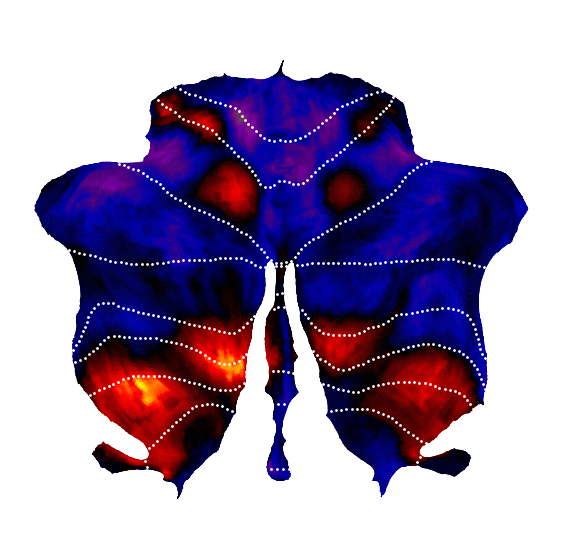

In [ ]:
# Compute the average connecivity for the model for each cortical parcel
C = nb.load(f'{gl.conn_dir}/maps/MdWfIbDeHtNiSoScLa_data_cerebellum.dscalar.nii')
V=nt.cifti.volume_from_cifti(C)
print(C.header.get_axis(0)[3])
Data=suit.vol_to_surf(V,space='MNISymC')
suit.plot(Data[:,3],cscale=[-1.8,1.8],cmap='roy_big_bl',bordercolor='white')
plt.savefig(f'{gl.fig_dir}/Action_observation_cerebellum.png',bbox_inches='tight')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


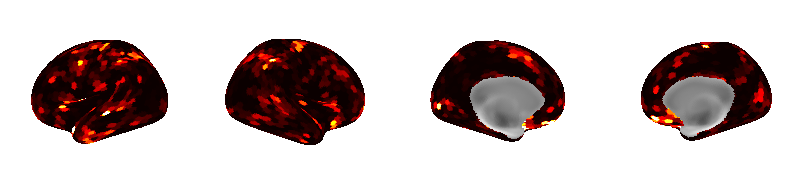

In [3]:
cifti_img = nb.load(gl.conn_dir + f'/maps/{traindata}_{cortex_roi}_{method}_{stats}.pscalar.nii')
data = nt.surf_from_cifti(cifti_img) 
fig, axes = plt.subplots(1, 4, subplot_kw={'projection': '3d'},figsize=(10, 8))
cs.plot_cortical_inflated(data=data,axes=axes, cscale=[0,0.2])


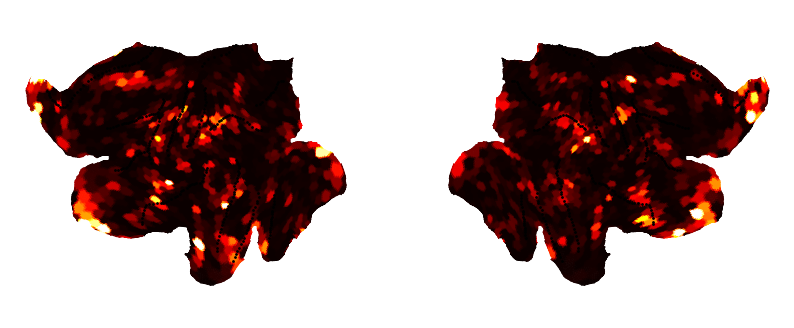

In [4]:
cifti_img = nb.load(gl.conn_dir + f'/maps/{traindata}_{cortex_roi}_{method}_{stats}.pscalar.nii')
data = nt.surf_from_cifti(cifti_img) 
fig, axes = plt.subplots(1, 2,figsize=(10, 4))
cs.plot_cortical_flatmap(data=data,axes = axes, cscale=[0,0.2],cmap='hot')

<Axes: >

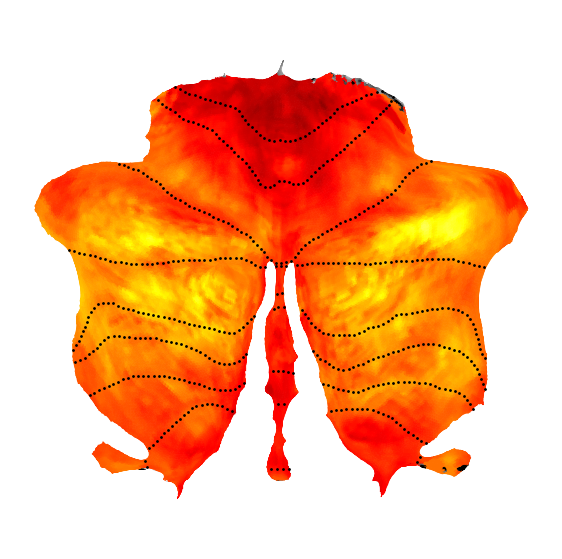

In [5]:
nifti_img = cs.stats_weight_map_cerebellum(traindata = traindata,
                            cortex_roi = cortex_roi,
                            method = method,
                            extension='A2_group',
                            stats = 'mean')
data = suit.vol_to_surf(nifti_img,space='MNISymC')
suit.plot(data,cscale=[0,0.001],cmap='hot')
